# Task Category: Data Science and Business Analytics
# Organization: The Sparks Foundation
# Grduate Rotational Internship Program (GRIP- June 2021)
# Author: Anjali Hinge
# Task No.5:-Exploratory Data Analysis -Sports
# Objective:
Find out most sucessful teams,players and factors contributing to win or loss of a team.

# Dataset use to Analysis
Sports dataset from https://bit.ly/34SRn3b

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1st Dataset:- Matches

In [2]:
# Reading the Dataset
data1=pd.read_csv("C:/Users/ANJALI HINGE/Desktop/Sparks Foundation/Indian Premier League/matches.csv")

In [3]:
data1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# Info about dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
# Checking for null values in each column
data1.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
# Percentage of cities present in dataset
round(data1['city'].value_counts(normalize=True)*100)

Mumbai            13.0
Kolkata           10.0
Delhi             10.0
Bangalore          9.0
Hyderabad          9.0
Chennai            8.0
Jaipur             6.0
Chandigarh         6.0
Pune               5.0
Durban             2.0
Bengaluru          2.0
Visakhapatnam      2.0
Centurion          2.0
Ahmedabad          2.0
Mohali             1.0
Rajkot             1.0
Indore             1.0
Dharamsala         1.0
Johannesburg       1.0
Cuttack            1.0
Abu Dhabi          1.0
Cape Town          1.0
Ranchi             1.0
Port Elizabeth     1.0
Raipur             1.0
Sharjah            1.0
Kochi              1.0
Kanpur             1.0
Kimberley          0.0
Nagpur             0.0
East London        0.0
Bloemfontein       0.0
Name: city, dtype: float64

In [7]:
# Matches where city is Isnull value
data1[data1['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [8]:
# As per the Venu
data1['city'].fillna('Abu Dhabi',inplace=True)

In [9]:
# Now we check null values for Winner
data1[data1['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [10]:
# As there is No result
data1['winner'].fillna('Draw',inplace=True)

In [11]:
#Replacing NaN with None
data1['player_of_match'].fillna('None',inplace=True)

In [12]:
round(data1['umpire1'].value_counts(normalize=True)*100,2)

HDPK Dharmasena    9.68
Asad Rauf          6.76
S Ravi             6.50
AK Chaudhary       5.70
Aleem Dar          5.04
                   ... 
Sundaram Ravi      0.13
A Nanda Kishore    0.13
Nanda Kishore      0.13
Ulhas Gandhe       0.13
SJA Taufel         0.13
Name: umpire1, Length: 61, dtype: float64

In [13]:
# check null values for umpire1
data1[data1['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [14]:
data1['umpire1'].fillna('HDPK Dharmasena',inplace=True)

In [15]:
# check null values for umpire2
round (data1['umpire2'].value_counts(normalize=True)*100,2)

C Shamshuddin            7.56
S Ravi                   7.56
SJA Taufel               7.16
RJ Tucker                5.04
CK Nandan                4.77
                         ... 
SJ Davis                 0.13
JD Cloete                0.13
Nand Kishore             0.13
KN Ananthapadmanabhan    0.13
SD Fry                   0.13
Name: umpire2, Length: 65, dtype: float64

In [16]:
# we will check for umpire2
data1[data1['umpire2'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,HDPK Dharmasena,NaN,NaN


In [17]:
# Fillna for umpire2
data1['umpire2'].fillna('S Ravi',inplace=True)

In [18]:
# check null values for umpire3
round (data1['umpire3'].value_counts(normalize=True)*100,2)

O Nandan                   8.40
Nitin Menon                8.40
C Shamshuddin              8.40
Anil Chaudhary             7.56
Vineet Kulkarni            6.72
S Ravi                     6.72
Bruce Oxenford             5.88
Anil Dandekar              5.88
Yeshwant Barde             5.88
Chris Gaffaney             5.04
Rod Tucker                 4.20
Marais Erasmus             4.20
Nigel Llong                3.36
A Nanda Kishore            2.52
Nanda Kishore              2.52
Ian Gould                  2.52
K Ananthapadmanabhan       1.68
Virender Kumar Sharma      1.68
Ulhas Gandhe               1.68
A.D Deshmukh               1.68
Kumar Dharmasena           1.68
Chettithody Shamshuddin    0.84
KN Ananthapadmanabhan      0.84
Sundaram Ravi              0.84
KN Anantapadmanabhan       0.84
Name: umpire3, dtype: float64

In [19]:
# we will check for umpire3
data1[data1['umpire3'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [20]:
# Fillna for umpire 3
data1['umpire3'].fillna('Nitin Menon',inplace=True)

In [21]:
# Now we don't have any null values in the dataset as we have done the Imputation for those.
data1.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [22]:
# All the Teams that we have in the Dataset

# They need to be correlated as there are duplicate records present
data1['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [23]:
# Replacing old teams with new ones
data1.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
data1.replace('Deccan Chargers','Sunrisers Hydrabad',inplace=True)
data1.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
data1.replace('Kings XI Punjab','Punjab Kings',inplace=True)

In [24]:
# Teams Present
data1['team1'].value_counts()

Mumbai Indians                 101
Punjab Kings                    91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Sunrisers Hyderabad             63
Sunrisers Hydrabad              43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [25]:
data1.replace('Pune Warriors','Rising Pune Supergiants',inplace=True)

In [26]:
data1['team1'].value_counts()

Mumbai Indians                 101
Punjab Kings                    91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Sunrisers Hyderabad             63
Sunrisers Hydrabad              43
Rising Pune Supergiants         35
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [27]:
# Final Dataset
data1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Nitin Menon
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Nitin Menon
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Nitin Menon
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Punjab Kings,Punjab Kings,field,normal,0,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Nitin Menon
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,Nitin Menon


In [28]:
# Info check
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
 17  umpire3          756 non-null    ob

# Data Visualization

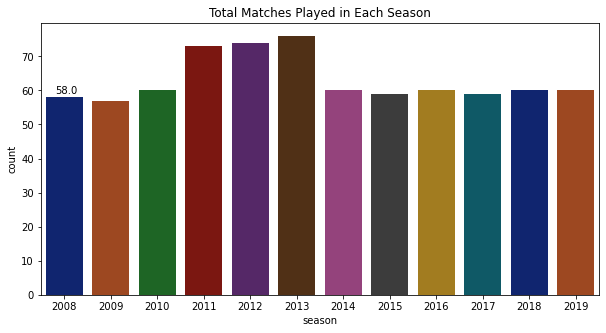

In [29]:
# Total Matches played each season
plt.subplots(figsize=(10,5))
ax=sns.countplot(x='season',data=data1,palette='dark')
plt.title('Total Matches Played in Each Season')

#Code to display the above values
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+1))
    plt.show()

#### Most number of matches were played in season 2013 which had around 76 matches being played.

## Most Wins By a Team

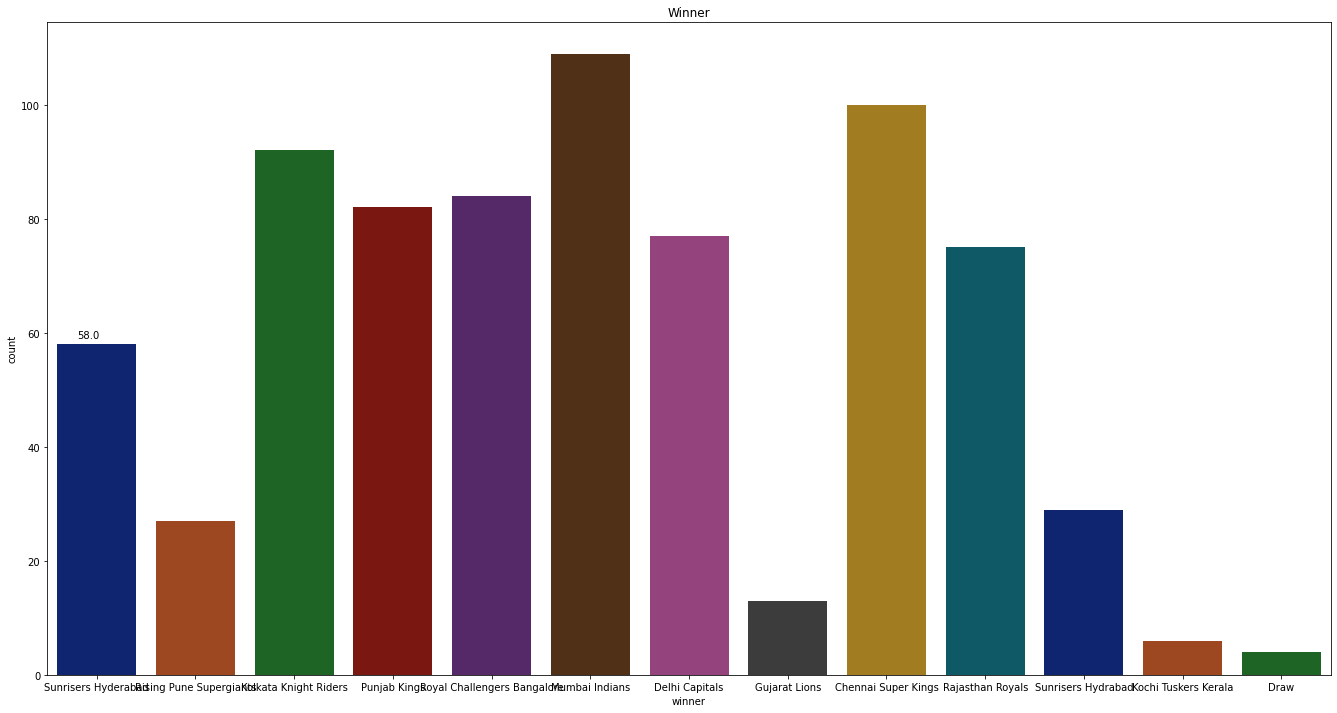

In [30]:
# Most wins by a Team 
plt.subplots(figsize=(23,12))
ax=sns.countplot(x='winner',data=data1,palette='dark')
plt.title('Winner')

# Code to display the above values
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+1))
    plt.show()

In [31]:
# Maximun Times Match winner
data1['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Punjab Kings                    82
Delhi Capitals                  77
Rajasthan Royals                75
Sunrisers Hyderabad             58
Sunrisers Hydrabad              29
Rising Pune Supergiants         27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Draw                             4
Name: winner, dtype: int64

#### Mumbai Indians is the most successfull team as they have won around 109 matches across all seasons followed by Chennai Super Kings 100.

In [32]:
# Maximum Times Player of Match
pom=data1['player_of_match'].value_counts()[:10]
pom

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

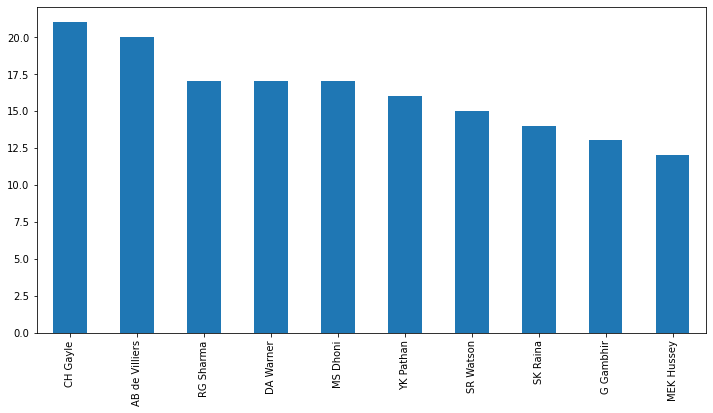

In [33]:
# This plot gives the top 10 player of the match maximum no. of times.
plt.figure(figsize=(12,6))
pom.plot.bar()
plt.xticks(rotation=90)
plt.show()

#### CH Gayle has been the most successfull when it comes to being the Player of the Match.He has received the award with 21 times.

In [34]:
#combining similer city
data1.replace('Bengaluru','Bangolre',inplace=True)

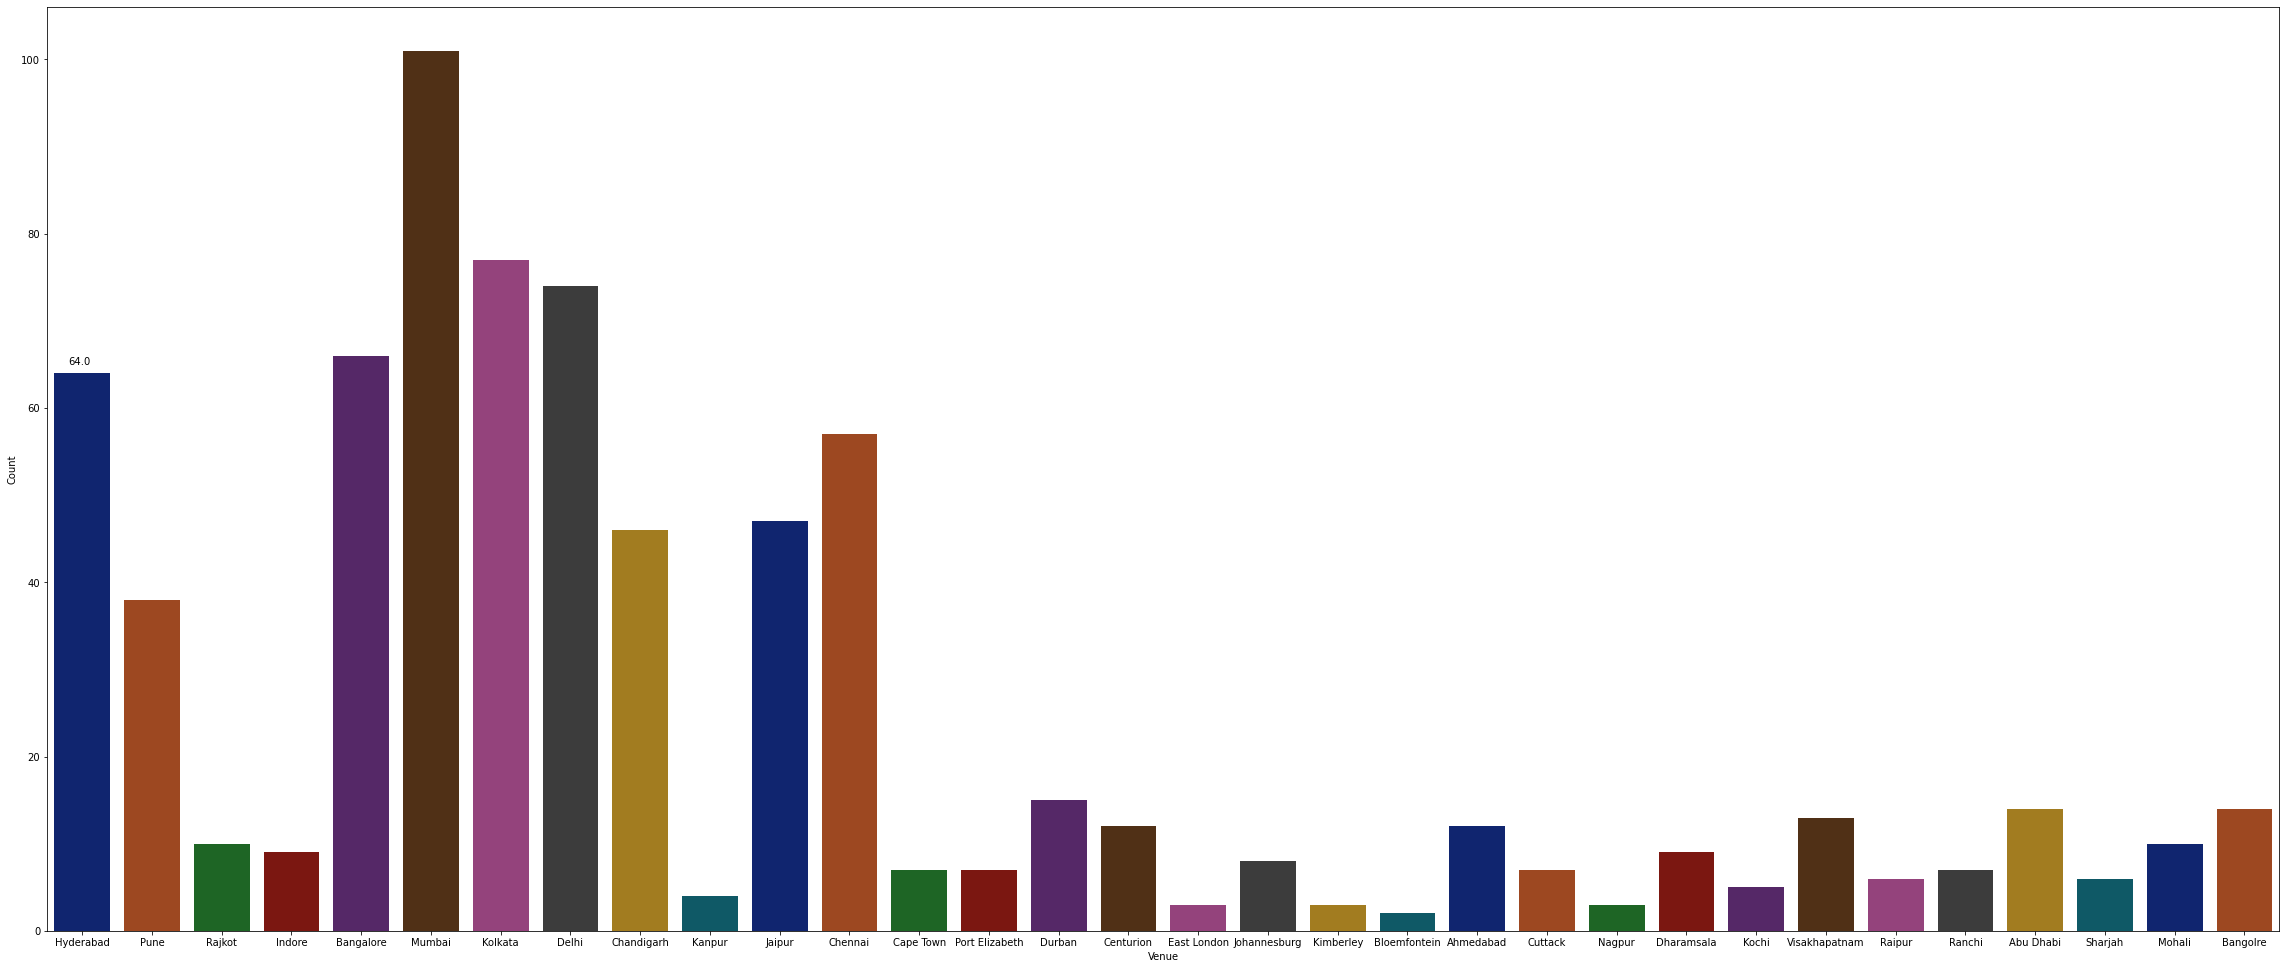

In [35]:
# Most matches played at a venue
plt.subplots(figsize=(40,17))
ax=sns.countplot(x='city',data=data1,palette='dark')
plt.title=("Most Matches Played in a City")
plt.ylabel('Count')
plt.xlabel('Venue')

# code to display the above values
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+1))
    plt.show()

#### In Mumbai most no. of matches have been played.

In [36]:
# Maximum Toss Winner
data1['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Delhi Capitals                 90
Chennai Super Kings            89
Royal Challengers Bangalore    81
Punjab Kings                   81
Rajasthan Royals               80
Sunrisers Hyderabad            46
Sunrisers Hydrabad             43
Rising Pune Supergiants        33
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

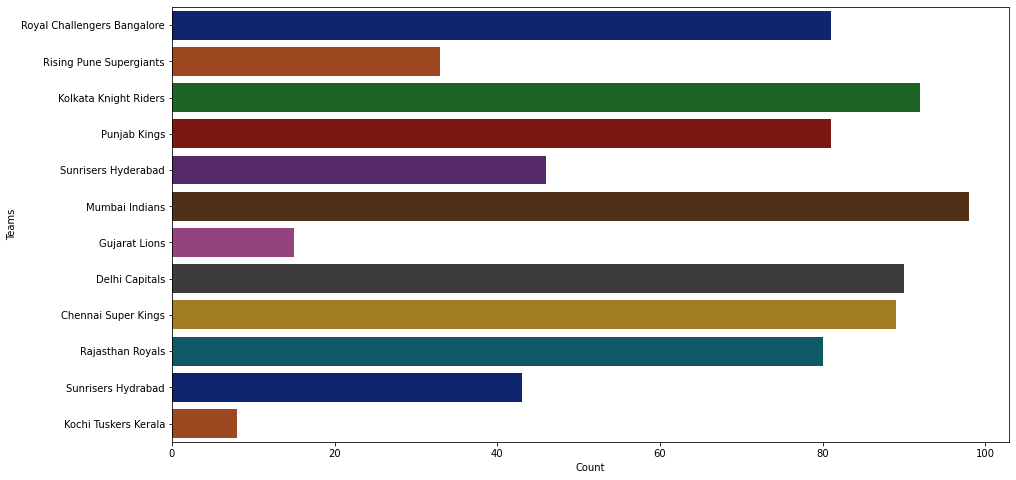

In [37]:
# Max toss win by a team
plt.subplots(figsize=(15,8))
ay=sns.countplot(y='toss_winner',data=data1,palette='dark')
plt.title=("Most Tosses won by a Team")
plt.ylabel('Teams')
plt.xlabel('Count')
plt.show()

#### Mumbai Indians have won the toss maximum no. of times. 

In [38]:
# Combining similar Entries
data1.replace("M Chinnaswamy Stadium","M Chinnaswamy Stadium",inplace=True)

In [39]:
# Count of Matches at a Venue
data1['venue'].value_counts().head()

Eden Gardens                                 77
M Chinnaswamy Stadium                        73
Wankhede Stadium                             73
Feroz Shah Kotla                             67
Rajiv Gandhi International Stadium, Uppal    56
Name: venue, dtype: int64

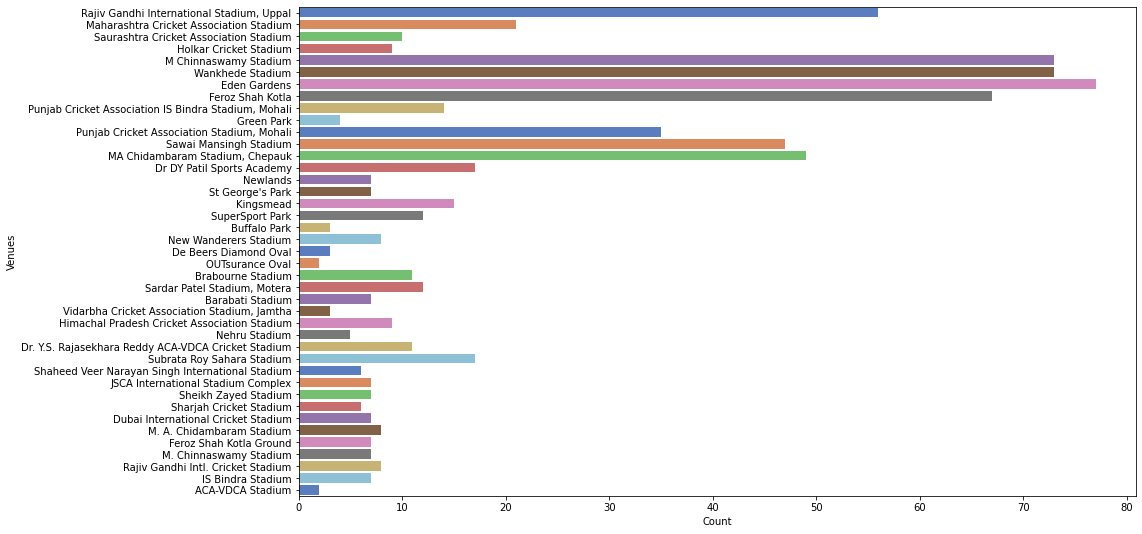

In [40]:
# Most Matches at a Venue
plt.subplots(figsize=(15,9))
ax=sns.countplot(y='venue',data=data1,palette='muted')
plt.ylabel('Venues')
plt.xlabel('Count')
plt.show()

#### Eden Gardens has most of the IPL matches. 

In [41]:
# Duckworth Lewis Matches Count
data1['dl_applied'].value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

#### So,there are 19 matches were DuckWorth Lewis method is taken into consideration. 

In [42]:
# List of the matches where we had DL Method used
dl=data1[(data1['dl_applied']==1)]
dl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
56,57,2017,Bangalore,2017-05-17,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,Nitin Menon
99,100,2008,Delhi,2008-05-17,Delhi Capitals,Punjab Kings,Delhi Capitals,bat,normal,1,Punjab Kings,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,Nitin Menon
102,103,2008,Kolkata,2008-05-18,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,Nitin Menon
119,120,2009,Cape Town,2009-04-19,Punjab Kings,Delhi Capitals,Delhi Capitals,field,normal,1,Delhi Capitals,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,Nitin Menon
122,123,2009,Durban,2009-04-21,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,Nitin Menon


#### Teams Winning Runs Margin

In [43]:
batting_first=data1[data1['win_by_runs']!=0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Nitin Menon
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,Nitin Menon
8,9,2017,Pune,2017-04-11,Delhi Capitals,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,Nitin Menon
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,Nitin Menon
14,15,2017,Delhi,2017-04-15,Delhi Capitals,Punjab Kings,Delhi Capitals,bat,normal,0,Delhi Capitals,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,Nitin Menon


TypeError: 'str' object is not callable

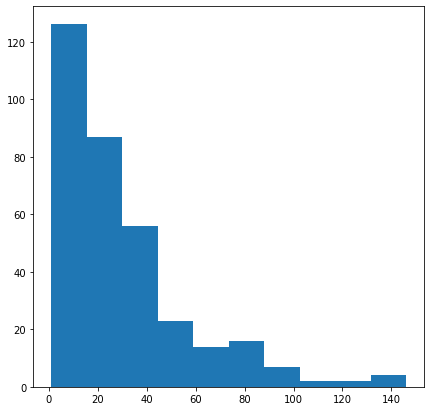

In [44]:
# barplot to understand the Distribution of a numerical column
plt.figure(figsize=(7,7))
plt.hist(batting_first['win_by_runs'])
plt.title ("Runs Margin")
plt.xlabel("Win by Runs ")
plt.ylabel("No.of Matches")
plt.show()

#### There are around 120+ matches where teams have won within 1-18 runs.

In [ ]:
# Teams which win most by batting first
batting_first['winner'].value_counts()

#### Mumbai indians win most of the matches by batting first.

## Pie Chart Analysis-Batting First

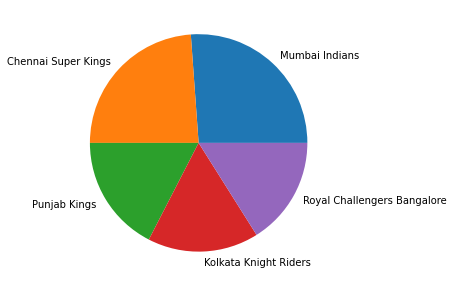

In [56]:
plt.figure(figsize=(12,5))
plt.pie(list(batting_first['winner'].value_counts()[0:5]),labels=list(batting_first['winner'].value_counts()[0:5].keys()))
plt.show()

#### Mumbai Indians have won most no.of matches when they have batted 1st in their innings.

#### Batting 2nd Analysis

In [45]:
# Batting 2nd win by wickets
batting_2nd=data1[data1['win_by_wickets']!=0]
batting_2nd.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Nitin Menon
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Nitin Menon
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Punjab Kings,Punjab Kings,field,normal,0,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Nitin Menon
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,Nitin Menon
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,Nitin Menon


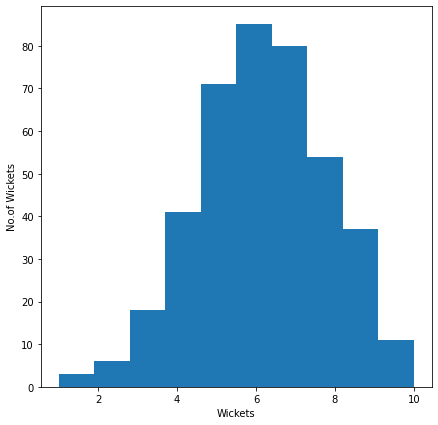

In [46]:
# Histogram
plt.figure(figsize=(7,7))
plt.hist(batting_2nd['win_by_wickets'])
plt.xlabel('Wickets')
plt.ylabel('No.of Wickets')
plt.show()

#### Here we can see that in 80+ matches teams have won the match by 5-6 wickets remaining.

### Team winning most matches by batting 2nd

In [47]:
batting_2nd['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Delhi Capitals                 48
Rajasthan Royals               46
Punjab Kings                   42
Sunrisers Hyderabad            27
Rising Pune Supergiants        14
Gujarat Lions                  12
Sunrisers Hydrabad             11
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

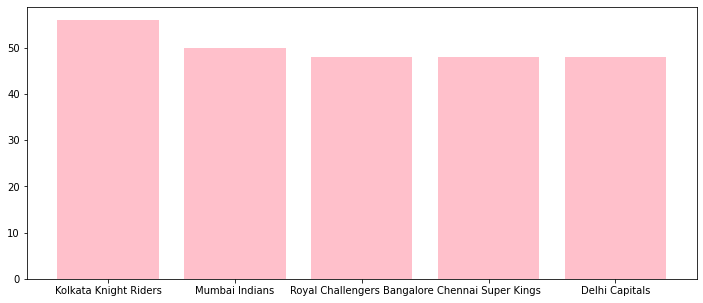

In [54]:
# Bar plot
plt.figure(figsize=(12,5))
plt.bar(list(batting_2nd['winner'].value_counts()[0:5].keys()),list(batting_2nd['winner'].value_counts()[0:5]),color=['Pink'])
plt.show()

#### Kolkata has been the best team it has come to chasing targets.They have won around 56 matches. 

## Pie Chart Analysis-Batting 2nd

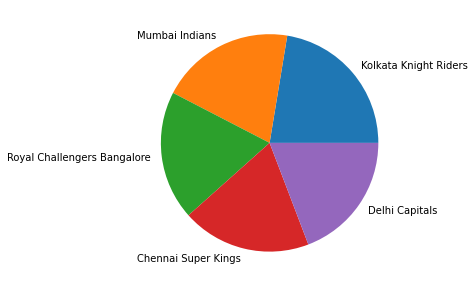

In [55]:
plt.figure(figsize=(12,5))
plt.pie(list(batting_2nd['winner'].value_counts()[0:5]),labels=list(batting_2nd['winner'].value_counts()[0:5].keys()))
plt.show()

## Result of Match 

In [58]:
round(data1['result'].value_counts(normalize=True)*100,2)

normal       98.28
tie           1.19
no result     0.53
Name: result, dtype: float64

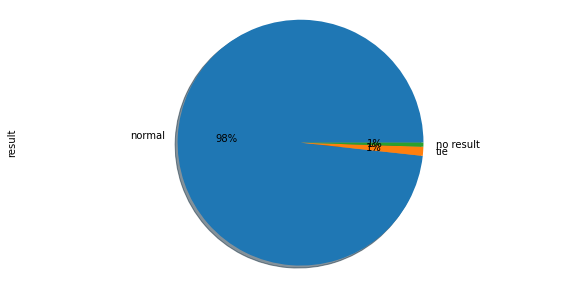

In [59]:
plt.figure(figsize=(10,5))
round(data1['result'].value_counts(normalize=True)*100,2).plot.pie(autopct='%1.0f%%',shadow=True)
plt.axis('equal')
plt.show()

## Toss Decisions

In [60]:
data1['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

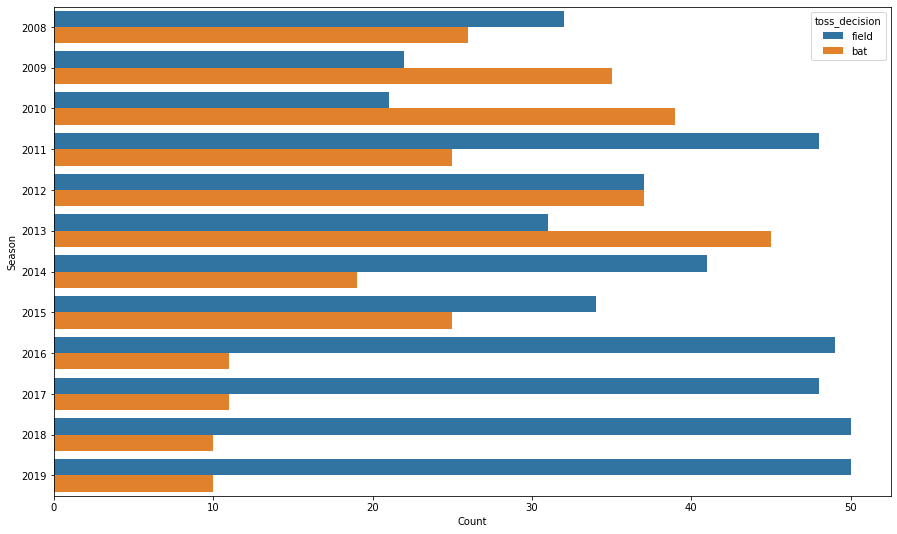

In [61]:
# Toss decisions Across Seasons
plt.subplots(figsize=(15,9))#,palette='muted'
ax=sns.countplot(y='season',data=data1,hue='toss_decision')
plt.ylabel('Season')
plt.xlabel("Count")
plt.show()

# 2nd Dataset-Deliveries

In [62]:
data2=pd.read_csv("C:/Users/ANJALI HINGE/Desktop/Sparks Foundation/Indian Premier League/deliveries.csv")

In [63]:
data2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [64]:
data2.duplicated().sum()

23

In [65]:
data2.drop_duplicates(inplace=True)

In [66]:
# Infromation about dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [67]:
# Checking for null values in each column
data2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

In [68]:
# Values present in Dismissal kind
data2['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [69]:
# Filling Null values for Dismissal Kind 
data2['dismissal_kind'].fillna('caught',inplace=True)

In [70]:
data2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind           0
fielder             172607
dtype: int64

In [71]:
data2.drop(['player_dismissed','fielder'],axis=1,inplace=True)

In [72]:
# Checking for duplicate Team Names and replacing them with new one
data2['batting_team'].value_counts()

Mumbai Indians                 22615
Kings XI Punjab                20929
Royal Challengers Bangalore    20905
Kolkata Knight Riders          20852
Chennai Super Kings            19761
Delhi Daredevils               18786
Rajasthan Royals               17287
Sunrisers Hyderabad            12907
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1908
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

In [73]:
data2.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
data2.replace('Deccan Chargers','Sunrisers Hydrabad',inplace=True)
data2.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
data2.replace('Kings XI Punjab','Punjab Kings',inplace=True)

## Team Batting the Most Number of Overs

In [76]:
overs_batted=data2.groupby(['batting_team']).sum()
overs_batted['total_balls']=data2['batting_team'].value_counts()
overs_batted['overs']=(overs_batted['total_balls']//6)
overs_batted[overs_batted['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,batting_team,overs
0,Mumbai Indians,3769
1,Punjab Kings,3488
2,Royal Challengers Bangalore,3484
3,Kolkata Knight Riders,3475
4,Delhi Capitals,3449


#### Mumbai Indians have batted the most no.of overs in the IPL history. 

## Team Bowling the Maximum No. of Overs

In [77]:
overs_bowled=data2.groupby(['batting_team']).sum()
overs_bowled['total_balls']=data2['bowling_team'].value_counts()
overs_bowled['overs']=(overs_bowled['total_balls']//6)
overs_bowled[overs_bowled['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,batting_team,overs
0,Mumbai Indians,3752
1,Royal Challengers Bangalore,3538
2,Kolkata Knight Riders,3489
3,Punjab Kings,3463
4,Delhi Capitals,3447


#### Mumbai Indians have bowled the most no.of Overs

## Players Bowling the Maximun No.of Overs

In [78]:
max_overs=data2.groupby(['bowler']).sum()
max_overs['total_balls']=data2['bowler'].value_counts()
max_overs['overs']=(max_overs['total_balls']//6)
max_overs[max_overs['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

,bowler,overs
0,Harbhajan Singh,575
1,A Mishra,528
2,PP Chawla,526
3,R Ashwin,502
4,SL Malinga,495


In [79]:
max_overs.reset_index()

,bowler,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,total_balls,overs
0,A Ashish Reddy,109528,442,3805,962,0,8,2,2,2,0,386,14,400,270,45
1,A Chandila,92700,348,1314,819,0,0,0,3,0,0,242,3,245,234,39
2,A Choudhary,3146,164,1002,402,0,6,0,0,1,0,137,7,144,108,18
3,A Dananjaya,197550,50,225,91,0,1,0,0,0,0,47,1,48,25,4
4,A Flintoff,8028,84,846,231,0,0,1,0,0,0,105,1,106,66,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,YA Abdulla,31818,337,2307,820,0,12,1,3,1,0,294,17,311,222,37
401,YK Pathan,448325,1681,10667,4273,0,43,1,27,0,0,1372,71,1443,1184,197
402,YS Chahal,6469807,2774,19257,6618,0,60,26,24,6,0,2300,116,2416,1840,306
403,Yuvraj Singh,379750,1316,10519,3134,0,12,6,8,1,0,1065,27,1092,882,147


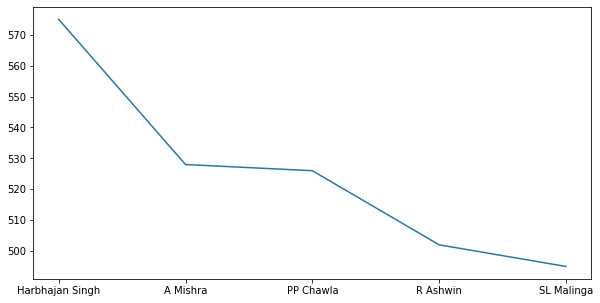

In [80]:
plt.figure(figsize=(10,5))
plt.plot(max_overs['overs'].sort_values(ascending=False)[0:5])
plt.show()

In [81]:
# Maximum Runs scored by a batsman-orange Cap
max_runs=data2.groupby(['batsman'])['batsman_runs'].agg('sum').sort_values(ascending=False).reset_index()
max_runs.head()

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4631


# Visualisation

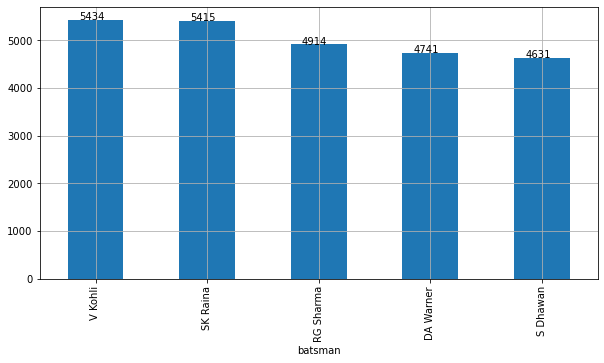

In [83]:
plt.figure(figsize=(10,5))
max_runs=data2.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[0:5].plot.bar()

# To display the counts
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.1,p.get_height()+1))
plt.grid()
plt.show()    

#### Virat Kohli has scored the Most No.of runs (5434) from season 2018-2019. 

In [85]:
# Extra Runs Count
data2['extra_runs'].value_counts()

0    169519
1      8494
2       407
4       348
5       219
3        67
7         1
Name: extra_runs, dtype: int64

In [88]:
# Most Extras
extras=data2.groupby(['bowler','bowling_team'])['extra_runs'].agg(lambda x:(x>0).sum()).reset_index().sort_values(by='extra_runs',ascending=False)
extras.head()

,bowler,bowling_team,extra_runs
595,SL Malinga,Mumbai Indians,221
94,B Kumar,Sunrisers Hyderabad,121
161,DJ Bravo,Chennai Super Kings,119
608,SR Watson,Rajasthan Royals,116
220,Harbhajan Singh,Mumbai Indians,116


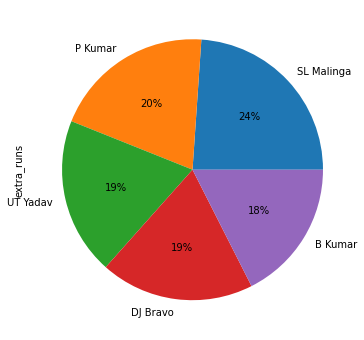

In [91]:
plt.figure(figsize=(12,6))
extras=data2.groupby(['bowler'])['extra_runs'].agg(lambda x:(x>0).sum())
ax=extras.sort_values(ascending=False)[:5].plot.pie(autopct='%1.0f%%')
plt.show()

#### SL Malinga has given the most No.of runs in extra around 221.

In [92]:
# Types of values in Dismissal
data2['dismissal_kind'].value_counts()

caught                   175569
bowled                     1581
run out                     852
lbw                         540
stumped                     278
caught and bowled           211
retired hurt                 12
hit wicket                   10
obstructing the field         2
Name: dismissal_kind, dtype: int64

In [94]:
# Dismissal which count as bowlers wicket
#so,here i have excluded the ones which don't count
dismissal=data2[(data2['dismissal_kind']!='runout')&(data2['dismissal_kind']!='retired_hurt')&(data2['dismissal_kind']!='obstructing the feild')]
dismissal.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,caught
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,caught
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,caught
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,caught
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,caught


In [96]:
# Most wickets-purple Cap
wickets=dismissal.groupby(['bowler','bowling_team'])['dismissal_kind'].count().reset_index().sort_values(by='dismissal_kind',ascending=False)
wickets.head(5)

,bowler,bowling_team,dismissal_kind
220,Harbhajan Singh,Mumbai Indians,2989
595,SL Malinga,Mumbai Indians,2974
604,SP Narine,Kolkata Knight Riders,2600
473,R Ashwin,Chennai Super Kings,2081
94,B Kumar,Sunrisers Hyderabad,2041


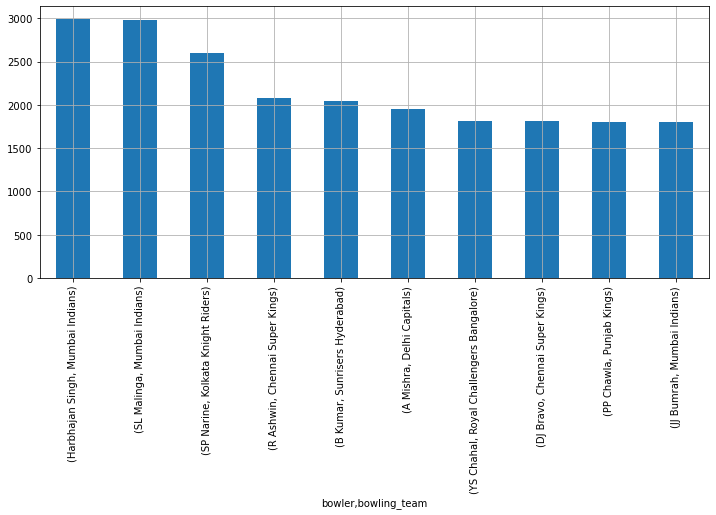

In [97]:
plt.figure(figsize=(12,5))
wickets=data2.groupby(['bowler','bowling_team'])['dismissal_kind'].count()
ax=wickets.sort_values(ascending=False)[:10].plot.bar()
plt.grid()

#### Leading Wicket Takers
1.Harbhajan Singh-Mumbai Indians   
2.SL Malinga-Mumbai Indians  
3.SP Narine-KKR

## Best Economy Rate 

In [101]:
best_economy=data2.groupby(['bowler']).sum()
best_economy['total_balls']=data2['bowler'].value_counts()
best_economy['overs']=(best_economy['total_balls']//6)
best_economy['economy_rate']=(best_economy['total_runs']//best_economy['overs'])
best_economy[best_economy['overs']>200].sort_values(by='economy_rate',ascending=True).head(5).reset_index()

,bowler,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,total_balls,overs,economy_rate
0,M Muralitharan,362463,2500,17669,5720,4,62,7,52,2,0,1642,123,1765,1581,263,6.0
1,SP Narine,6778191,3603,30423,9217,6,57,11,44,2,0,2825,114,2939,2600,433,6.0
2,R Ashwin,7297716,4659,29889,10884,0,111,9,45,2,0,3224,167,3391,3016,502,6.0
3,DW Steyn,1243407,3459,19688,8059,6,105,6,53,7,0,2283,171,2454,2207,367,6.0
4,MM Patel,302875,2048,12230,4920,0,17,8,27,11,0,1670,63,1733,1382,230,7.0


#### Best Economy Rate as per Minimum overs 200
1.M Muralitharan  
2.SP Narine   
3.R Ashwin  
4.DW Steyn  
5.MM Patel

## Strike Rate

In [103]:
balls_faced=data2.groupby(['batsman'])['ball'].count().reset_index().sort_values(by='ball',ascending=False)
balls_faced.head()

,batsman,ball
486,V Kohli,4211
428,SK Raina,4044
367,RG Sharma,3816
392,S Dhawan,3775
147,G Gambhir,3524


In [104]:
max_runs.head()

batsman
A Ashish Reddy    280
A Chandila          4
A Chopra           53
A Choudhary        25
A Dananjaya         4
Name: batsman_runs, dtype: int64

In [105]:
SR_data=pd.merge(balls_faced,max_runs,how='inner',on='batsman')
SR_data.head()

,batsman,ball,batsman_runs
0,V Kohli,4211,5434
1,SK Raina,4044,5415
2,RG Sharma,3816,4914
3,S Dhawan,3775,4631
4,G Gambhir,3524,4223


In [114]:
SR_data['strike_Rate']=round((SR_data['batsman_runs']/SR_data['ball'])*100,2).sort_values(ascending=False)

In [113]:
SR_data.head().sort_values(by='strike_Rate',ascending=False)

,batsman,ball,batsman_runs,strike_Rate
1,SK Raina,4044,5415,133.90
0,V Kohli,4211,5434,129.04
2,RG Sharma,3816,4914,128.77
3,S Dhawan,3775,4631,122.68
4,G Gambhir,3524,4223,119.84


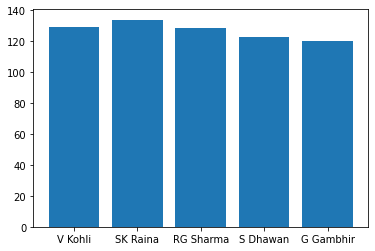

In [109]:
plt.bar(SR_data['batsman'][0:5],SR_data['strike_Rate'][0:5])
plt.show()

#### Players with Highest Strike Rate
1.V Kohli  
2.SK Raina  
3.RG Sharma  
4.S Dhawan  
5.G Gambhir

# Conclusion
1.Teams which have won most no.of Matches are Mumbai Indians(109)and Chennai Super Kings(100).     
2.CH Gayle-21 Player of the Match Awards.   
3.Batting First_Mumbai Indians have Won-57 Matches.  
4.Batting 2nd-KKR won 56 Matches.  
5.Mumbai Indians have batted and also bowled the Most Number of Overs in IPL history.  
6.VK Kohli is the leading  run Scorer in the IPL history.  
7.Suresh Raina is the 2nd highest run Scorer in the IPL with 5415 runs.  
8.Harbhajan Singh is the leading wicket taker with 2989 wickets followed by LS Malinga 2974 wickets.  
9.M Muralitharan seems to have the best economy rate(min.200 overs) of 6 from season 2008 to 2019.  
10.SK Raina has the best Strike Rate in the IPL 133.90.